In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from PIL import Image

# Load images from folders
def load_images_from_folder(base_path, image_size=(64, 64)):
    data = []
    labels = []
    for label in os.listdir(base_path):
        folder = os.path.join(base_path, label)
        if os.path.isdir(folder):
            for filename in os.listdir(folder):
                img_path = os.path.join(folder, filename)
                img = Image.open(img_path).convert("L").resize(image_size)
                img_array = np.array(img).flatten()
                data.append(img_array)
                labels.append(label)
    return np.array(data), np.array(labels)

# Load and preprocess the dataset
data_path = r"C:\Users\Shaikh Irfan\Downloads\drive-download-20250419T131102Z-001\shapes B6"  # path to your folder
X, y = load_images_from_folder(data_path)

# Encode labels (circle, square, triangle to 0,1,2)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Try different values of k
for k in [1, 3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    print(f"\n🔎 Results for k = {k}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))




🔎 Results for k = 1
Accuracy: 0.6166666666666667
Classification Report:
              precision    recall  f1-score   support

     circles       0.65      0.68      0.67        22
     squares       0.46      0.81      0.59        16
   triangles       1.00      0.41      0.58        22

    accuracy                           0.62        60
   macro avg       0.71      0.63      0.61        60
weighted avg       0.73      0.62      0.61        60


🔎 Results for k = 3
Accuracy: 0.6333333333333333
Classification Report:
              precision    recall  f1-score   support

     circles       0.64      0.73      0.68        22
     squares       0.54      0.81      0.65        16
   triangles       0.82      0.41      0.55        22

    accuracy                           0.63        60
   macro avg       0.67      0.65      0.63        60
weighted avg       0.68      0.63      0.62        60


🔎 Results for k = 5
Accuracy: 0.48333333333333334
Classification Report:
              prec

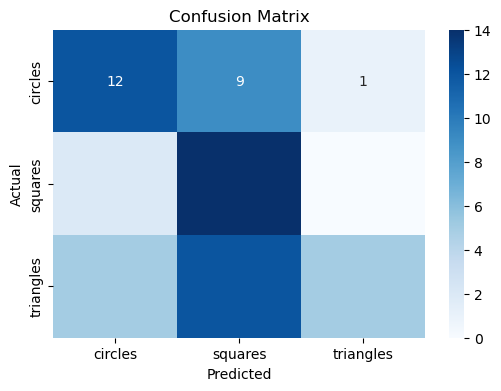

In [4]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
